# 卷积代码具体实现

误区澄清：输出的大小不一定等于输入图像的大小，这取决于使用的卷积方式（padding、stride）。

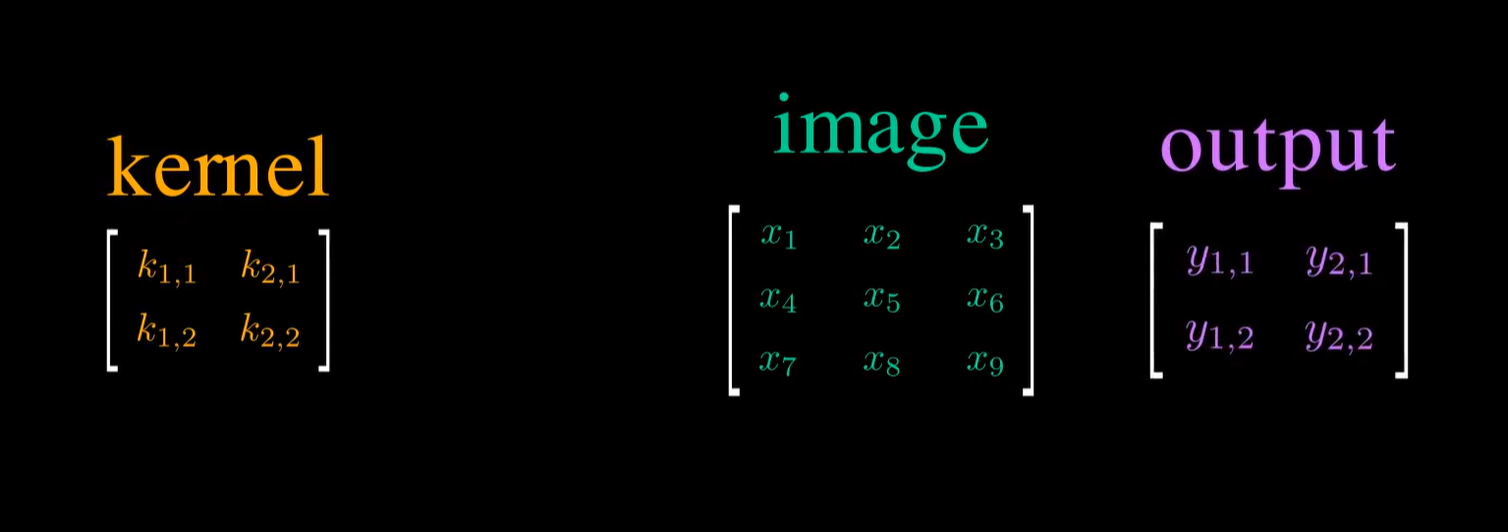

对于二维卷积，输出尺寸为：
$$
output\_size = \frac{input\_size-kernel\_size}{stride}+1
$$
一般而言stride=1,即每次移动一个像素

若想让输出和原图尺寸一样，需要添加 padding,且保证 padding = (kernel_size - 1) / 2

如果 kernel 是 3×3，则 padding = 1 → 输出尺寸不变  
如果 kernel 是 2×2，则 padding = 0.5 → 不行（必须整数）  
所以：只有当 kernel 是奇数时，才能通过 padding 让输出和输入一样大

## Padding函数

### zero-padding
在图像边缘补零（zero-padding），使得卷积核可以在边缘也能完整地覆盖。

In [2]:
import numpy as np
def padding(img, padding_size, type):
    """
        The function you need to implement for Q1 a).
        Inputs:
            img: array(float)
            padding_size: int
            type: str, zeroPadding/replicatePadding
        Outputs:
            padding_img: array(float)
    """
    height,width=img.shape

    padding_height=height+2*padding_size
    padding_width=width+2*padding_size

    if type=="zeroPadding":
        padding_img=np.zeros((padding_height,padding_width))
        padding_img[padding_size:-padding_size,padding_size:-padding_size]=img  
        return padding_img
    elif type=="replicatePadding":
        padding_img=np.empty((padding_height,padding_width))
        padding_img[padding_size:-padding_size,padding_size:-padding_size]=img

        # 填充上下行
        padding_img[0:padding_size,padding_size:-padding_size]=img[0,:] # 0:padding_size而不是0
        padding_img[-padding_size:,padding_size:-padding_size]=img[-1,:]

        # 填充左右行+角
        padding_img[:,0:padding_size]=padding_img[:,padding_size:padding_size+1]
        padding_img[:, -padding_size:]=padding_img[:, -padding_size-1:-padding_size]
        return padding_img

original_image = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
padded_zero_image = padding(original_image, 1, "zeroPadding")
print("\nZero Padded Image (padding_size=1):\n", padded_zero_image)
padded_replicate_image = padding(original_image, 1, "replicatePadding")
print("\nReplicate Padded Image (padding_size=1):\n", padded_replicate_image)


Zero Padded Image (padding_size=1):
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]

Replicate Padded Image (padding_size=1):
 [[1. 1. 2. 3. 3.]
 [1. 1. 2. 3. 3.]
 [4. 4. 5. 6. 6.]
 [7. 7. 8. 9. 9.]
 [7. 7. 8. 9. 9.]]
